# Análise de dados - Risco de crédito

Utilizando um dataset do kaggle, tratado anteriormente, que traz dados relacionados a quem solicita a empréstimo, como idade, tipo de moradia,renda e outras informações, foi feito uma análise exploratória dos dados, com os seguites objetivos:


### Identificar quais variáveis influenciam na classificação do empréstimo como sendo de risco ou não.

### Analisar o comportamento dessas variáveis em função do risco de crédito.


link do dataset original: https://www.kaggle.com/laotse/credit-risk-dataset?select=credit_risk_dataset.csv

- Importando as bibliotecas que vão ser utilizadas para análise e visualização.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- Carregando e exibindo os dados.

In [2]:
df = pd.read_csv('dados_analise_risco_de_cresdito.csv')

In [3]:
df.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo,tipo_moradia_id,objetivo_emprestimo_id,class_risco_historico_id
0,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0,3,1,1
1,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1,1,5,2
2,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1,0,5,2
3,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1,0,5,2
4,21,2.0,propria,risco,2500,7.14,9900,0.25,A,0,2,1,3,4,0


- Utilizando a função info, podemos ver a quantidade de registros, bem como se há dados ausentes e o tipo das colunas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31679 entries, 0 to 31678
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         31679 non-null  int64  
 1   tempo_de_emprego              31679 non-null  float64
 2   tipo_moradia                  31679 non-null  object 
 3   objetivo_emprestimo           31679 non-null  object 
 4   montante_emprestimo           31679 non-null  int64  
 5   taxa_juros                    31679 non-null  float64
 6   renda_por_ano                 31679 non-null  int64  
 7   porc_empr_renda_anual         31679 non-null  float64
 8   class_risco_historico         31679 non-null  object 
 9   inadimplencia_hist            31679 non-null  int64  
 10  qtd_anos_primeiro_emprestimo  31679 non-null  int64  
 11  risco_emprestimo              31679 non-null  int64  
 12  tipo_moradia_id               31679 non-null  int64  
 13  o

Iniciando a parte de análise exploratória dos dados e visualização.



# EDA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,31679.0,27.730673,6.213427,20.00,23.00,26.000000,30.00,94.00
tempo_de_emprego,31679.0,4.782064,4.034948,0.00,2.00,4.000000,7.00,41.00
montante_emprestimo,31679.0,9659.962436,6334.360554,500.00,5000.00,8000.000000,12500.00,35000.00
taxa_juros,31679.0,11.037008,3.070182,5.42,8.49,11.011695,13.16,23.22
renda_por_ano,31679.0,66490.099182,52768.793429,4000.00,39366.00,56000.000000,80000.00,2039784.00
porc_empr_renda_anual,31679.0,0.169610,0.106269,0.00,0.09,0.150000,0.23,0.83
inadimplencia_hist,31679.0,0.177657,0.382230,0.00,0.00,0.000000,0.00,1.00
qtd_anos_primeiro_emprestimo,31679.0,5.809211,4.059710,2.00,3.00,4.000000,8.00,30.00
risco_emprestimo,31679.0,0.215442,0.411135,0.00,0.00,0.000000,0.00,1.00
tipo_moradia_id,31679.0,0.648190,0.831427,0.00,0.00,0.000000,1.00,3.00


 Por meio da função describe do pandas, pode ser feita uma análise preliminar dos dados, podendo ter informações como a média das variáveis, desvio padrão, valor mínimo, valor máximo e a distribuição dos dados.

- Plotando a matriz de correlação.

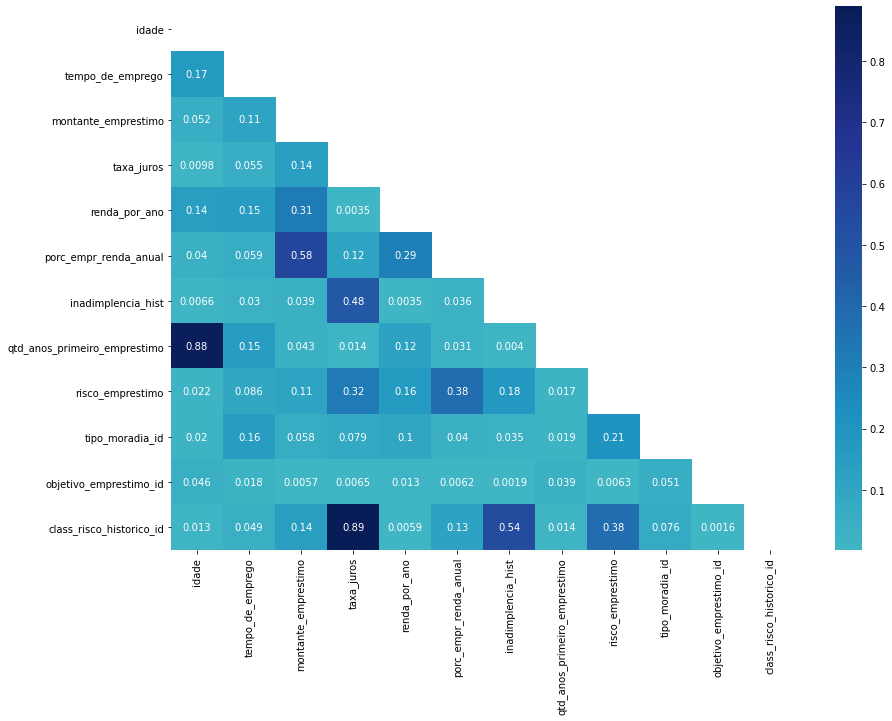

In [6]:
plt.figure(figsize=(14,10))

corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

plt.show()

 Após analisar a matriz de correlação, selecionei apenas as variáveis que tem maior correlação com a variável **risco_emprestimo**, para a partir daí iniciar a análise e observar como essas variáveis se comportam em relação a variável **risco_emprestimo**.
 
 Variáveis que tem maior correlação com a variável **risco_emprestimo**

In [7]:
df[['tipo_moradia','inadimplencia_hist','taxa_juros','porc_empr_renda_anual','class_risco_historico','risco_emprestimo']].head(10)

,tipo_moradia,inadimplencia_hist,taxa_juros,porc_empr_renda_anual,class_risco_historico,risco_emprestimo
0,propria,0,11.14,0.10,B,0
1,hipoteca,0,12.87,0.57,C,1
2,alugada,0,15.23,0.53,C,1
3,alugada,1,14.27,0.55,C,1
4,propria,0,7.14,0.25,A,1
5,alugada,0,12.42,0.45,B,1
6,alugada,0,11.11,0.44,B,1
7,alugada,0,8.90,0.42,A,1
8,propria,0,14.74,0.16,D,1
9,alugada,0,10.37,0.41,B,1


 Iniciando a análise e visualização.
 
 
 Utilizando as bibliotecas matplolib e seaborn, gerei alguns gráficos que facilitem a análise e visualização dos dados, em relação ao risco de emréstimo.

# Tipo de moradia

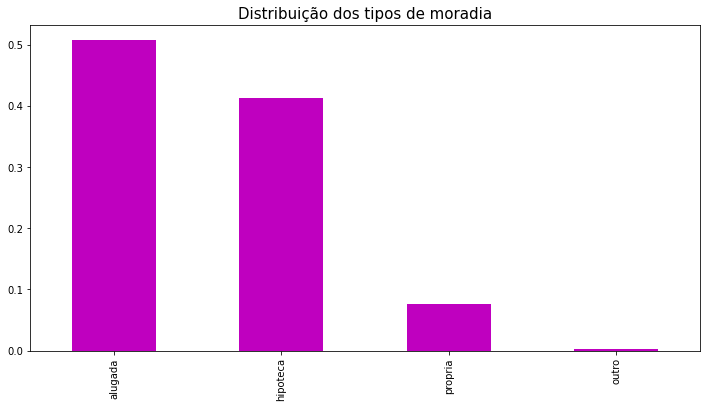

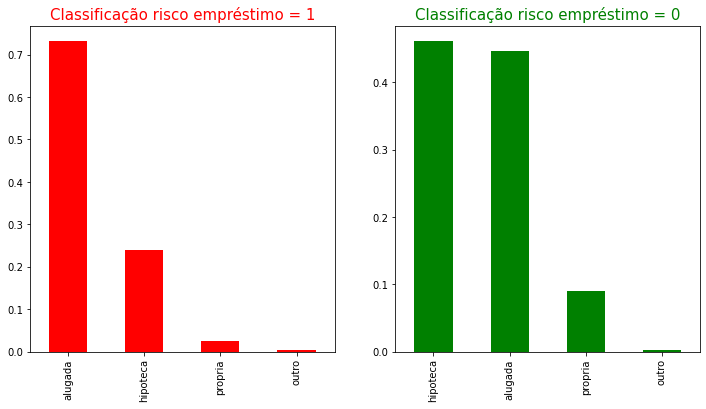

In [8]:
df.tipo_moradia.value_counts(normalize=True).plot(kind='bar',color='m',figsize=(12,6))
plt.title('Distribuição dos tipos de moradia',fontsize=15)


fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] == 1 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15,color='r')

df[df['risco_emprestimo'] == 0 ].tipo_moradia.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15,color='green')

plt.show()

Analisando os graficos acimas podemos concluir que:

  De acordo com primeiro gráfico, que traz informações gerais sobre o dataset, podemos concluir que pessoas que tem moradia própria dificilmente solicitam empréstimo, representando menos de 10% dos empréstimos solicitados.
  
  Ainda olhando para o primeiro gráfico, pode-se concluir que pessoas que moram em casa alugada são as que mais solicitam empréstimos, ficando em torno de 50% dos empréstimos solicitados.
  
  Partindo para as análises de quando o empréstimo e considerado de risco ou não, pode ser observado que:
  
  - Quando o empréstimo é considerado de risco, tem mais de 70% chance do tipo de moradia ser alugada e a chance é mínima do tipo de moradia ser própria.
  - Pessoas com moradia própriao também possuem empréstimos classificados como de risco, o que concluindo que outros fatores interferem nessa classificação de risco de empréstimo.
  - 
  
  Se não há risco de empréstimo --> +/- 44 % mora em cassa hipotecada
  
  Se não há risco de empréstimo -->  +/- 44 % mora em cassa alugada

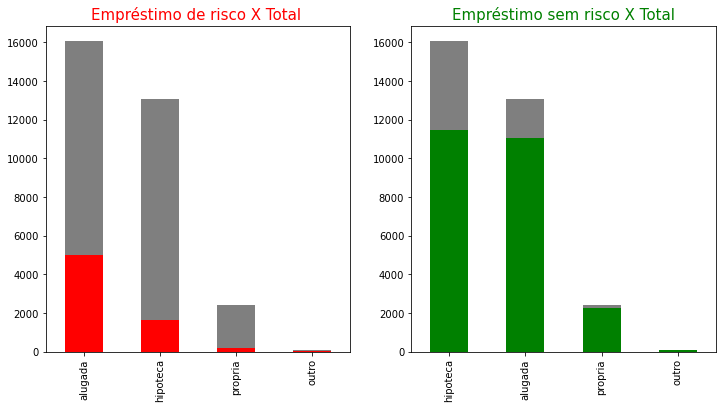

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,6))# Tipo de moradia 

df.tipo_moradia.value_counts().plot(kind='bar',color='k',ax=ax[0],alpha=0.5)
df[df['risco_emprestimo'] == 1 ].tipo_moradia.value_counts().plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Empréstimo de risco X Total ',fontsize=15,color='r')


df.tipo_moradia.value_counts().plot(kind='bar',color='k',ax=ax[1],alpha=0.5)
df[df['risco_emprestimo'] == 0 ].tipo_moradia.value_counts().plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Empréstimo sem risco X Total',fontsize=15,color='green')

plt.show()

- Acima pode se verificar em valor absoluto quanto cada categoria representa em relação ao total, quando um empréstimo é de risco ou não.

# Inadimplência histórica

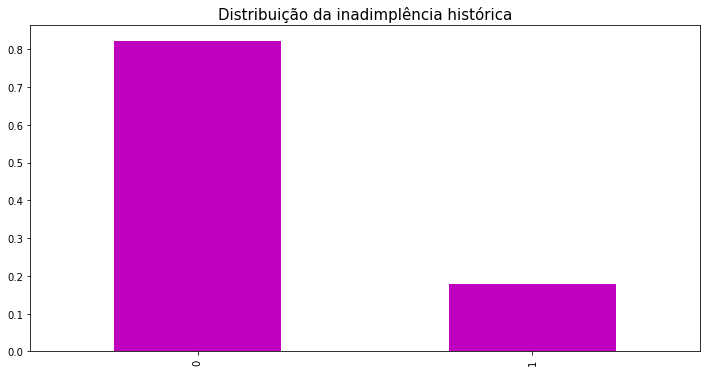

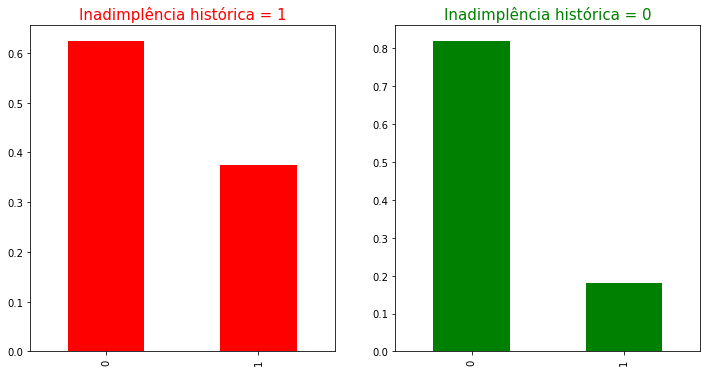

In [10]:
df.inadimplencia_hist.value_counts(normalize=True).plot(kind='bar',color='m',figsize=(12,6))
plt.title('Distribuição da inadimplência histórica',fontsize=15)

fig, ax = plt.subplots(1,2, figsize=(12,6))


df[df['inadimplencia_hist'] ==1 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15, color='r')


df[df['inadimplencia_hist'] == 0 ].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')



plt.show()

Analisando os gráficos acimas pode-se concluir que :

 De acordo com o gráfico da distribuição da inadimplência histórica, que traz informações gerais sobre o dataset, podemos concluir que cerca de 20% das pessoas possui algum registro de inadimlência.
 
 Partindo para as análises de quando há histórico de inadimplência ou não, pode ser observado que:
    
   - Quando há histórico de inadimplência , existe também uma tendência maior do empréstimo ser classificado como de risco, chegando a um valor de quase 40% dos registros.
   - Quando não há histórico de inadimplência , existe também a chance do empréstimo ser classificado como de risco cai quase que pela metade.

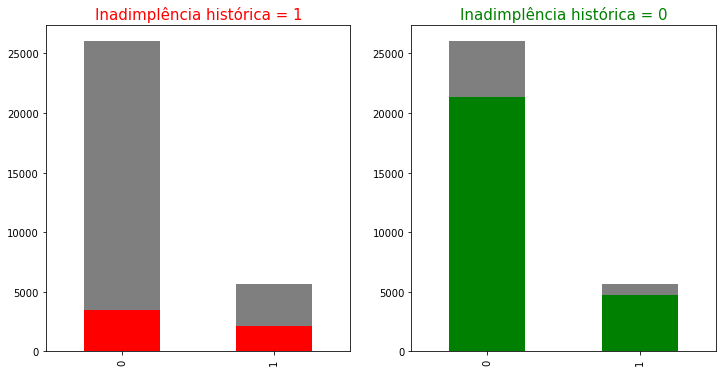

In [11]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df.inadimplencia_hist.value_counts().plot(kind='bar',color='k',ax=ax[0],alpha=0.5)
df[df['inadimplencia_hist'] ==1 ].risco_emprestimo.value_counts().plot(kind='bar',ax=ax[0],color='r')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15, color='r')

df.inadimplencia_hist.value_counts().plot(kind='bar',color='k',ax=ax[1],alpha=0.5)
df[df['inadimplencia_hist'] == 0 ].risco_emprestimo.value_counts().plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')


plt.show()

- Acima pode se verificar em valor absoluto quanto cada categoria representa em relação ao total, quando um empréstimo é de risco ou não.

# Taxa de juros empregada no empréstimo


# Porcentagem da renda anual

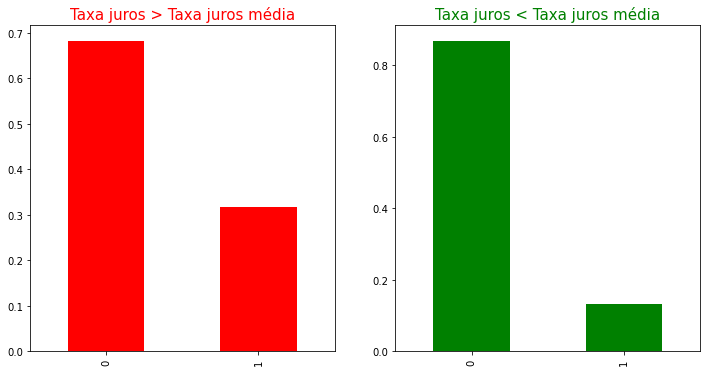

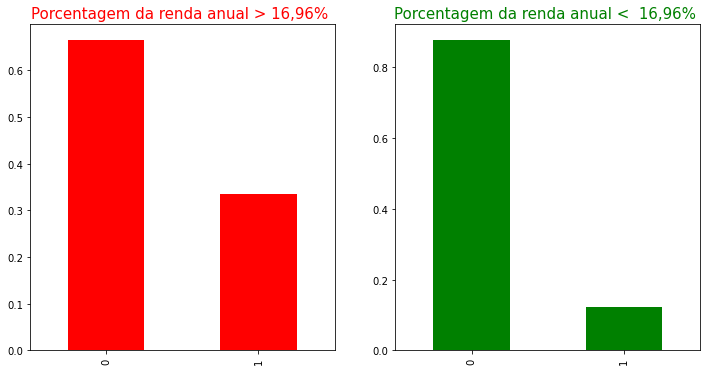

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['taxa_juros'] > 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Taxa juros > Taxa juros média',fontsize=15,color='red')


df[df['taxa_juros'] < 11.037157].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Taxa juros < Taxa juros média',fontsize=15,color='green')




fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['porc_empr_renda_anual'] > 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Porcentagem da renda anual > 16,96% ',fontsize=15,color='red')

df[df['porc_empr_renda_anual'] < 0.169612].risco_emprestimo.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Porcentagem da renda anual <  16,96% ',fontsize=15,color='green')

plt.show()

Analisando os gráficos acimas pode-se concluir que :

- Quando a taxa de juros ou a porcentagem da renda anual são maiores que a média, aumenta também a chance do empréstimo ser classificado como de risco.

# Classificação de risco histórico

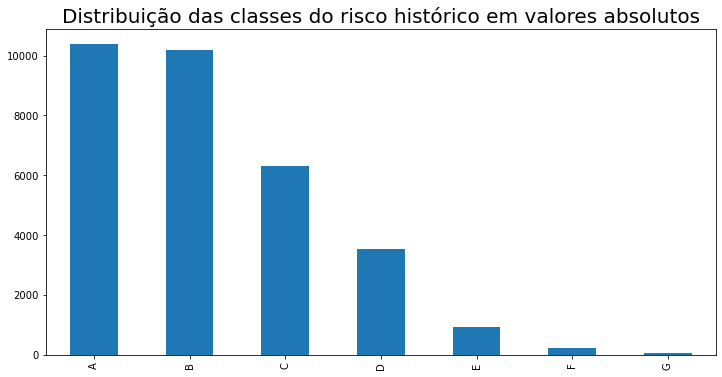

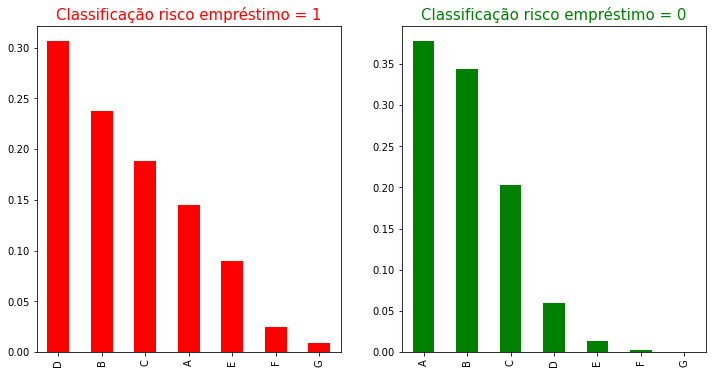

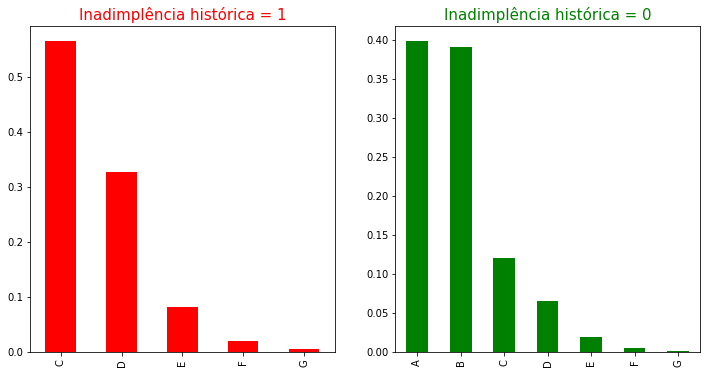

In [13]:
df.class_risco_historico.value_counts().plot(kind='bar',figsize=(12,6))
plt.title('Distribuição das classes do risco histórico em valores absolutos',fontsize=20)

fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['risco_emprestimo'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Classificação risco empréstimo = 1',fontsize=15,color='red')

df[df['risco_emprestimo'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Classificação risco empréstimo = 0',fontsize=15,color='green')



fig, ax = plt.subplots(1,2, figsize=(12,6))

df[df['inadimplencia_hist'] ==1 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[0],color='red')
ax[0].set_title('Inadimplência histórica = 1',fontsize=15,color='red')

df[df['inadimplencia_hist'] == 0 ].class_risco_historico.value_counts(normalize=True).plot(kind='bar',ax=ax[1],color='green')
ax[1].set_title('Inadimplência histórica = 0',fontsize=15,color='green')

plt.show()

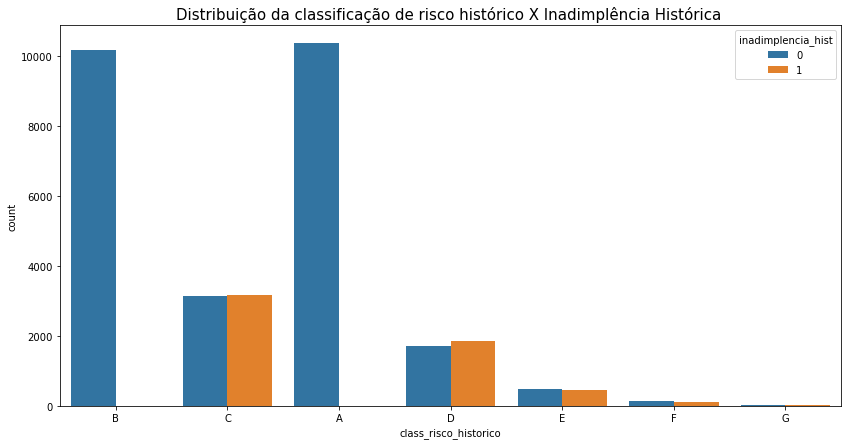

In [14]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x='class_risco_historico',hue='inadimplencia_hist', data = df)
ax.set_title('Distribuição da classificação de risco histórico X Inadimplência Histórica ',fontsize=15)
ax=ax

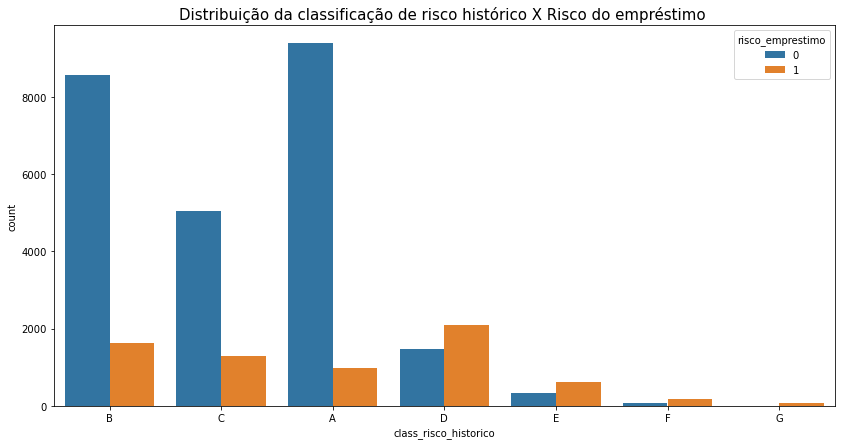

In [15]:
plt.figure(figsize=(14,7))
ax=sns.countplot(x='class_risco_historico',hue='risco_emprestimo', data = df)
ax.set_title('Distribuição da classificação de risco histórico X Risco do empréstimo ',fontsize=15)
ax=ax

Analisando os graficos acimas podemos concluir que:

  Quem pertence a classe A ou classe B pode ser considerado como bom pagador, já que não tem histórico de inadimplência.
  
  Quem pertence a classe C  está fortemente relacionado a ter um histórico de inadimplência.
  
  Quem pertence a classe D está fortemente relacionado a empréstimo de risco.
  
  Existem poucos registros da classes E,F e G, mas pode-se concluir que quem pertence a classe E está mais ligada a empréstimos de risco e a um histórico de inadimplência.
  
  Quem pertence a classe F ou classe G está associado a  empréstimo de risco.  